<h1 style="color: white; box-shadow: 0px 0px 2px rgb(0,2,12); text-align: center; background: green"><br>Perceptron <br></h1>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [3]:
class Perceptron:
    def __init__(self):
        self.learning_rate = 0.1
        self.epochs= 15
    
    def fitting(self, X, y):
        self.weights= np.zeros(1+ X.shape[1])
        self.errors = []
        
        for i in range(self.epochs):
            errors = 0
            print("Epoch: ",i)
            for xi, target in zip(X, y):
                update = self.learning_rate * (target- self.predict(xi))
                self.weights[1:]+= update * xi
                self.weights[0] += update
                errors += int(update!=0.0)
            self.errors.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:])+ self.weights[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)     
        

In [12]:
def main():
    print("Reading Machine Learning Database")
    df= pd.read_csv('./Datasets/iris.data', header= None)
    y= df.iloc[0:100, 4].values
    y= np.where(y== 'Iris-setosa', -1, 1)
    print("Assigning X= df.iloc")
    X= df.iloc[0:100, [0,2]].values
    print("Scatter Graph: ")
    plt.scatter(X[:50,0], X[:50,1], color='red', marker='*', label ='setosa')
    plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker ='x', label='versicolor')
    plt.xlabel('sepal length')
    plt.ylabel('petal length')
    plt.legend(loc='upper left')
    print("plt.show()")
    plt.show()
    print("Calling perceptron")
    ppn= Perceptron()
    print("Calling Fitting Function")
    ppn.fitting(X,y)
    print("Showing Convergence Graph")
    plt.plot(range(1, len(ppn.errors)+1), ppn.errors, marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Number of Misclassification")
    plt.show()

Reading Machine Learning Database
Assigning X= df.iloc
Scatter Graph: 
plt.show()


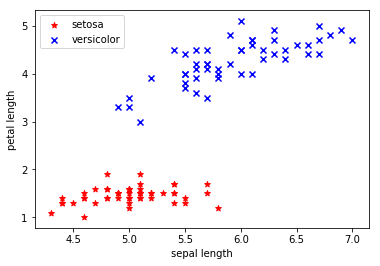

Calling perceptron
Calling Fitting Function
Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Showing Convergence Graph


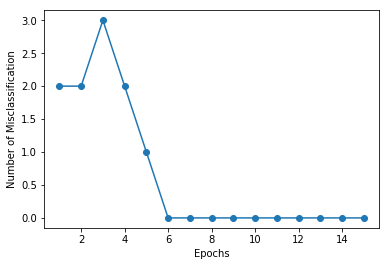

In [13]:
main()

<h1 style="color: white; box-shadow: 0px 0px 10px rgb(0,2,12); text-align: center; background: teal; font-family: Verdana; radius: 2px;"><br>Adaline Perceptron <br></h1>

In [73]:
class Adaline:
    def __init__(self):
        self.learning_rate = 0.1
        self.epochs = 100
    
    def fitting(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.cost = []
        cost= 0
        for i in range(self.epochs):
            output= self.net_input(X)
            errors = (y-output)
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost= (errors**2).sum()/2.0
            self.cost.append(cost)
            print("Cost: ", cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:] + self.weights[0])

    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X)>=0.0,1,-1
                       )

In [79]:
def new_main():
    print("Reading Datasets")
    df= pd.read_csv('./Datasets/iris.data', header= None)
    y= df.iloc[0:100, 4].values
    y= np.where(y=='Iris-setosa', -1,1)
    print("Assigning X= df.iloc")
    X= df.iloc[0:100, [0,2]].values
    X[:,0] = (X[:,0] -X[:,0].mean()) / X[:,0].std()
    X[:,1] = (X[:,1] -X[:,1].mean()) / X[:,1].std()
    print("Scatter Graph: ")
    plt.scatter(X[:50,0], X[:50,1], color='red', marker='*', label='setosa')
    plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend(loc='upper left')
    print("plt.show()")
    plt.show()
    
    print("Calling Adaline")
    print("Calling Ada1")
    fig, ax = plt.subplots(nrows =1, ncols=1, figsize= (8,4))
    ada1= Adaline()
    ada1.fitting(X,y)
    ax.plot(range(1, len(ada1.cost)+1), ada1.cost, marker='o')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Sum Squared Error')
    ax.set_title('Adaline- Misclassification - Learning Rate 0.1')

Reading Datasets
Assigning X= df.iloc
Scatter Graph: 
plt.show()


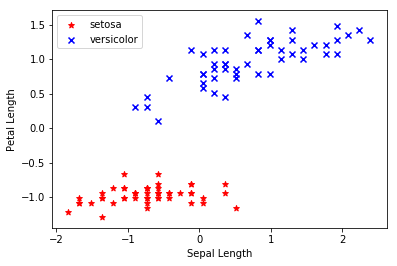

Calling Adaline
Calling Ada1
Cost:  50.0
Cost:  11673.668522900525
Cost:  3420584.0769568216
Cost:  1003007888.3636408
Cost:  294109676689.6442
Cost:  86241098835355.12
Cost:  2.528827753024589e+16
Cost:  7.415223009480098e+18
Cost:  2.174348656786054e+21
Cost:  6.375792171352096e+23
Cost:  1.8695587612136356e+26
Cost:  5.482063824689314e+28
Cost:  1.6074928695184794e+31
Cost:  4.71361408438035e+33
Cost:  1.3821621332058665e+36
Cost:  4.0528819887878644e+38
Cost:  1.188417192195969e+41
Cost:  3.4847681886966366e+43
Cost:  1.0218304993142141e+46
Cost:  2.996289890144062e+48
Cost:  8.785951399772067e+50
Cost:  2.5762841657302157e+53
Cost:  7.554378348558157e+55
Cost:  2.2151528543431802e+58
Cost:  6.495441374128789e+60
Cost:  1.9046432196325435e+63
Cost:  5.584941168957567e+65
Cost:  1.6376593547391419e+68
Cost:  4.8020705698233974e+70
Cost:  1.4081000234164796e+73
Cost:  4.128939063089211e+75
Cost:  1.2107192318156523e+78
Cost:  3.550163942578416e+80
Cost:  1.0410063446570408e+83
Cost: 

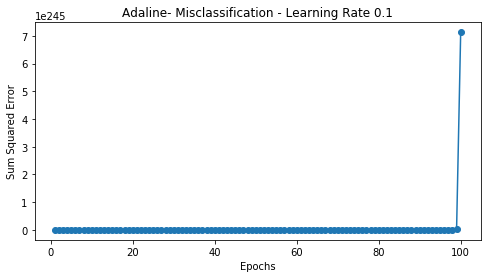

In [80]:
new_main()

<h1 style="color: white; background: black; text-align: center"><br>Logistic Regression<br></h1>

In [ ]:
class LogisticRegression:
    def __init__(self):
        self.epochs= 1000
        self.learning_rate = 0.1
    
    def sigmoid(self, x):
        return 1/(1+ np.exp(-x))
    
    def fitting(self, X, y):
        self.weights= np.zeros(1+ X.shape[1])
        for i in range(epochs):
            sigValue= sigmoid(np.dot(X, self.weights[1:]) + self.weights[0])
            self.weights[1:]= self.weights[1:] + learning_rate * (y-sigValue)* X[1:]
            
            
            
            
        

<h1 style="color: teal; background: #251818; text-align: center"><br>SVM<br></h1>

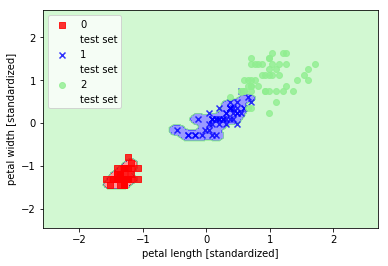

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    # highlight test sample
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c='',alpha=1.0, linewidth=1, marker='o',s=55, label='test set')

from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
#svm = SVC(kernel='poly', random_state=0, degree = 8) #->> Polynomial Kernel
#svm= SVC(kernel='linear', random_state=0, C=1.0)      #->> Linear Kernel 
svm= SVC(kernel='rbf', gamma= 100.0, random_state=0, C=2.00)  # ->> Radial Basis Kernel
svm.fit(X_train_std, y_train)

plot_decision_regions(X=X_combined_std,y=y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Non Linear SVM

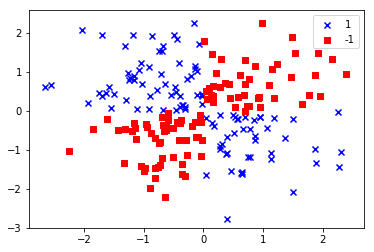

In [10]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

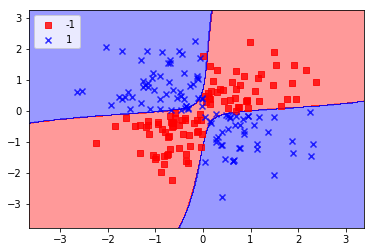

In [11]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

_____

In [3]:
from sklearn import datasets
import pandas as pd

In [15]:
iris= datasets.load_iris()
data_frame= iris.data
label= ['Sepal Length', 'Sepal Width', 'Petal length', 'Petal Width']
data_frame= pd.DataFrame(data=data_frame, columns= label)
data_frame

,Sepal Length,Sepal Width,Petal length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [16]:
target_frame= iris.target
target_frame= pd.DataFrame(target_frame)
target_frame

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [58]:
arr= np.arange(-7,7,0.1)

In [59]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

In [60]:
sig_values= sigmoid(arr)

In [61]:
sig_values

array([9.11051194e-04, 1.00677082e-03, 1.11253603e-03, 1.22939862e-03,
       1.35851995e-03, 1.50118226e-03, 1.65880108e-03, 1.83293894e-03,
       2.02532039e-03, 2.23784852e-03, 2.47262316e-03, 2.73196076e-03,
       3.01841632e-03, 3.33480731e-03, 3.68423990e-03, 4.07013772e-03,
       4.49627316e-03, 4.96680165e-03, 5.48629890e-03, 6.05980149e-03,
       6.69285092e-03, 7.39154134e-03, 8.16257115e-03, 9.01329865e-03,
       9.95180187e-03, 1.09869426e-02, 1.21284350e-02, 1.33869178e-02,
       1.47740317e-02, 1.63024994e-02, 1.79862100e-02, 1.98403057e-02,
       2.18812709e-02, 2.41270214e-02, 2.65969936e-02, 2.93122308e-02,
       3.22954647e-02, 3.55711893e-02, 3.91657228e-02, 4.31072549e-02,
       4.74258732e-02, 5.21535631e-02, 5.73241759e-02, 6.29733561e-02,
       6.91384203e-02, 7.58581800e-02, 8.31726965e-02, 9.11229610e-02,
       9.97504891e-02, 1.09096821e-01, 1.19202922e-01, 1.30108474e-01,
       1.41851065e-01, 1.54465265e-01, 1.67981615e-01, 1.82425524e-01,
      

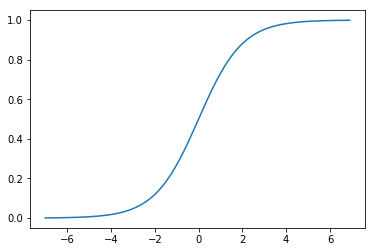

In [62]:
plt.plot(arr, sig_values)
plt.show()

In [57]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')plt.ylabel('$\phi (z)$')
plt.show()

TypeError: data type not understood